In [112]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [113]:
df=pd.read_csv("Position_Salaries.csv")
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [114]:
# Define x and y
x = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

In [115]:
# Create an instance of the LinearRegression model
lin_reg = LinearRegression()
lin_reg.fit(x,y)

LinearRegression()

In [116]:
 #Fitting the Polynomial regression to the dataset  
poly_reg=PolynomialFeatures(degree=4)
x_poly=poly_reg.fit_transform(x)
poly_reg.fit(x_poly,y)
lin_reg_2=LinearRegression()
lin_reg_2.fit(x_poly,y)

LinearRegression()

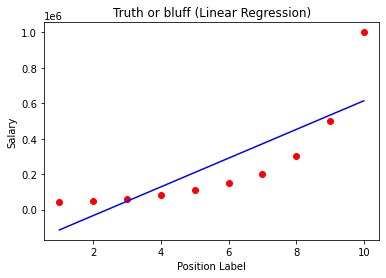

In [117]:
#Plotting Linear Regression
plt.scatter(x,y,color='red')

plt.plot(x,lin_reg.predict(x),color='blue')
plt.title('Truth or bluff (Linear Regression)')
plt.xlabel('Position Label')
plt.ylabel('Salary')
plt.show()


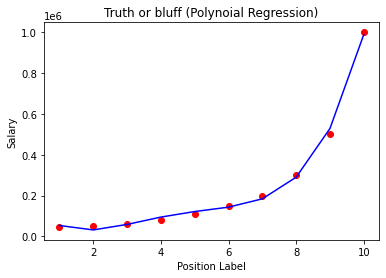

In [118]:
#Plotting Polynomial Regression

plt.scatter(x,y,color='red')

plt.plot(x,lin_reg_2.predict(poly_reg.fit_transform(x)),color='blue')
plt.title('Truth or bluff (Polynoial Regression)')
plt.xlabel('Position Label')
plt.ylabel('Salary')
plt.show()


In [119]:
# results by Linear Regression
lin_pred=lin_reg.predict([[6.5]])
print(lin_pred)

[330378.78787879]


In [120]:
# results by Polynomial Regression
poly_pred = lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))  
print(poly_pred)  


[158862.45265153]


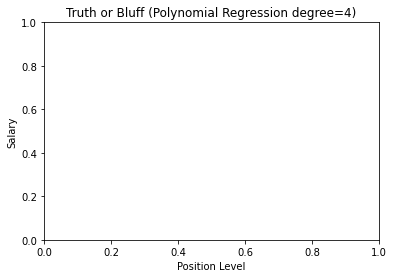

In [124]:
from matplotlib.animation import FuncAnimation

# Define the animation function to update the line at each frame
def animate(frame):
    # Calculate the predicted values for the current frame
    x_pred = np.array([[frame/10]])
    y_pred = lin_reg_2.predict(poly_reg.fit_transform(x_pred))

    # Update the line data
    line.set_data(x_pred, y_pred)
    return line,

# Create the animation object
anim = FuncAnimation(fig, animate, frames=50, interval=100)

# Display the animation
plt.title('Truth or Bluff (Polynomial Regression degree=4)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()
